In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import pylab as pylab
import pandas as pd
import random
import cv2
import skimage
from skimage import io 

In [2]:
url = r'C:\Users\nitinkohli\MIAS\all-mias'

df = pd.read_csv(r'C:\Users\nitinkohli\MIAS\Info.txt', sep=' ')

img_name = []

for i in range(df.shape[0]):
        img_name.append(df.REFNUM[i]+ '.pgm')
img_name = np.array(img_name)
        
img_add = []
for i in range(df.shape[0]):
    img_add.append(url + '\\' + df.REFNUM[i]+ '.pgm')
img_add = np.array(img_add)

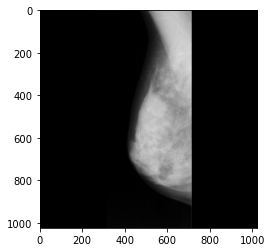

In [35]:
rand = random.randint(0, 330)
img = cv2.imread(img_add[rand])
plt.imshow(img)

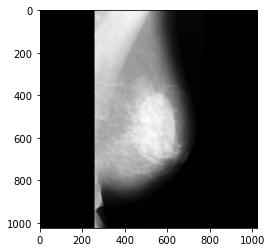

In [13]:
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image, cmap='gray')

In [14]:
def labelling():
    df = pd.read_csv(r'C:\Users\nitinkohli\MIAS\Info.txt', sep=" ")
    df.drop_duplicates(subset = "REFNUM", keep = 'first', inplace = True)
    df.reset_index(inplace = True)
    print("labelling")
    info={}
    for i in range(len(df)):
        if (df.CLASS[i] == "NORM"):
            info[df.REFNUM[i]] = 0
        else:
            if (df.SEVERITY[i] == 'B'):
                info[df.REFNUM[i]] = 1
            elif (df.SEVERITY[i] == 'M'):
                info[df.REFNUM[i]] = 2
    return (info)

In [45]:
def read_image():
    print("Reading images")
    import cv2
    info = {}
    for i in range(322):
        if i<9:
            image_name='mdb00'+str(i+1)
        elif i<99:
            image_name='mdb0'+str(i+1)
        else:
            image_name = 'mdb' + str(i+1)
#         print(image_name)
        image_address = url + '\\' + image_name + '.pgm'
#         print(image_address)
        img = cv2.imread(image_address, 0)
#         print(i)
        try:
#             img = cv2.resize(img, (64, 64))   #resize image
#             rows, cols = img.shape
            info[image_name] = img
        except:
            print("except")
    return (info)

In [46]:
label_info = labelling()
image_info = read_image()
ids = label_info.keys()

labelling
Reading images


In [56]:
X=[]
Y=[]
for id in ids:
    X.append(image_info[id])
    Y.append(label_info[id])

In [58]:
X=np.array(X)
Y=np.array(Y)
print(len(X))
print(len(Y))

322
322


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)